In [1]:
import pandas as pd
import sys
sys.path.append(r'C:\Users\User\Downloads\film\Rossmann-Pharmaceuticals-Store-Sales-Prediction\src')
from data_cleaning import handle_missing_values, detect_and_remove_outliers
from data_visualization import (
    visualize_promotion_distribution, visualize_sales_behavior_during_holidays, 
    visualize_correlation_sales_customers, visualize_promo_effect_on_sales,
    visualize_assortment_effect_on_sales, visualize_store_opening_trends)
from feature_analysis import (
    compare_promotion_distribution, analyze_seasonal_sales, analyze_promo_effect, 
    analyze_store_promo_recommendations, analyze_distance_effect_on_sales, 
    analyze_new_competitor_effect)
from logging_config import setup_logging
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("../data/store.csv")
data1=pd.read_csv("../data/train.csv",low_memory=False)

In [3]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
data=pd.merge(data,data1,on="Store",how="inner")

In [6]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [8]:
setup_logging()

2024-09-21 22:47:47,246 - INFO - Logging configured at c:/Users/User/Downloads/film/Rossmann-Pharmaceuticals-Store-Sales-Prediction/logs\eda_log.txt


In [9]:
data= handle_missing_values(data)

2024-09-21 22:47:48,675 - INFO - Missing values handled.


In [10]:
data = detect_and_remove_outliers(data)

2024-09-21 22:47:49,398 - INFO - Outliers removed using Z-score method.


In [11]:
data.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,PromoInterval,Date,StateHoliday
0,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,5,5263,555,1,1,1,c,a,"Jan,Apr,Jul,Oct",2015-07-31,0
1,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,4,5020,546,1,1,1,c,a,"Jan,Apr,Jul,Oct",2015-07-30,0
2,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,3,4782,523,1,1,1,c,a,"Jan,Apr,Jul,Oct",2015-07-29,0
3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,2,5011,560,1,1,1,c,a,"Jan,Apr,Jul,Oct",2015-07-28,0
4,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,1,6102,612,1,1,1,c,a,"Jan,Apr,Jul,Oct",2015-07-27,0


In [12]:
data.isnull().sum()

Store                        0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
StoreType                    0
Assortment                   0
PromoInterval                0
Date                         0
StateHoliday                 0
dtype: int64

In [13]:
train_df,test_df=train_test_split(data,test_size=0.2,random_state=42)

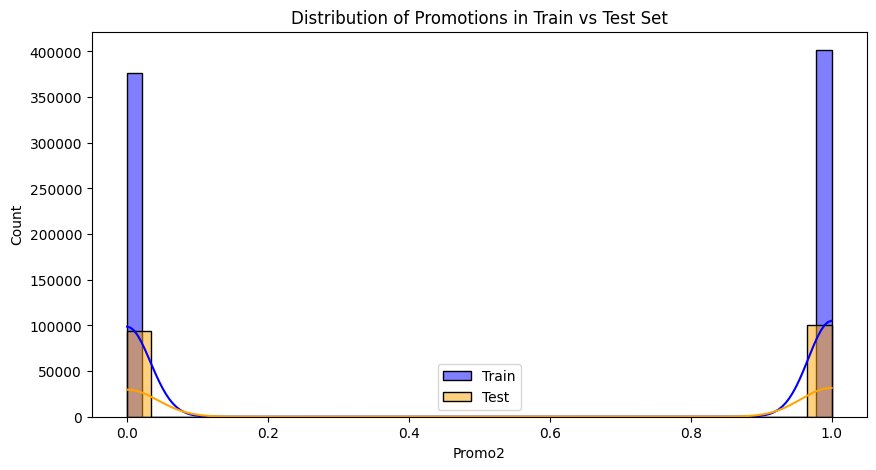

2024-09-21 22:48:06,797 - INFO - Promotion distribution visualized.


In [14]:
visualize_promotion_distribution(train_df, test_df)

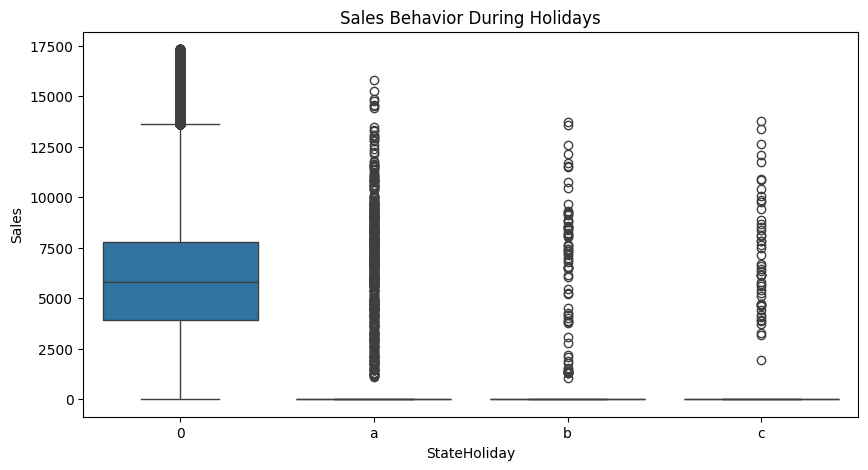

2024-09-21 22:48:09,239 - INFO - Sales behavior during holidays visualized.


In [15]:
visualize_sales_behavior_during_holidays(data)

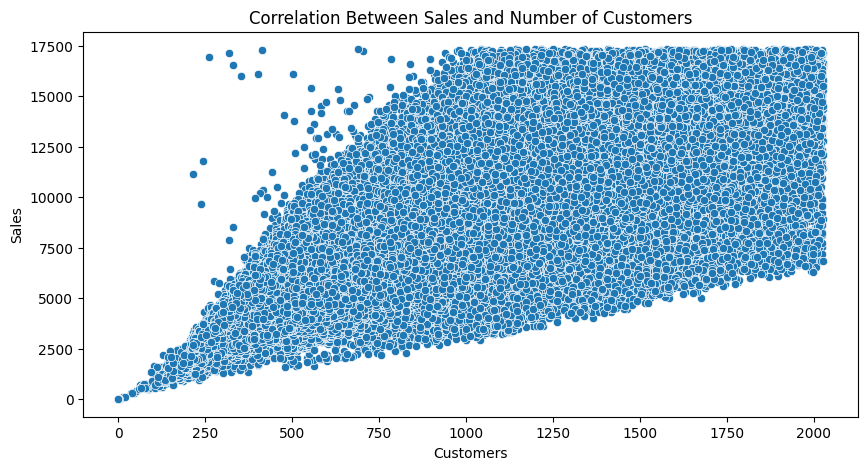

2024-09-21 22:48:13,300 - INFO - Correlation between sales and number of customers visualized.


In [16]:
visualize_correlation_sales_customers(data)

2024-09-21 22:48:14,445 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 22:48:15,145 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


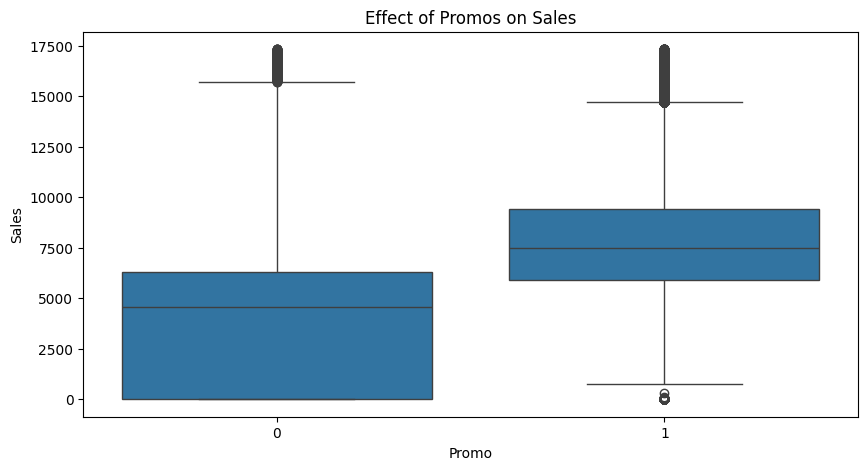

2024-09-21 22:48:15,716 - INFO - Promo effect on sales visualized.


In [17]:
visualize_promo_effect_on_sales(data)

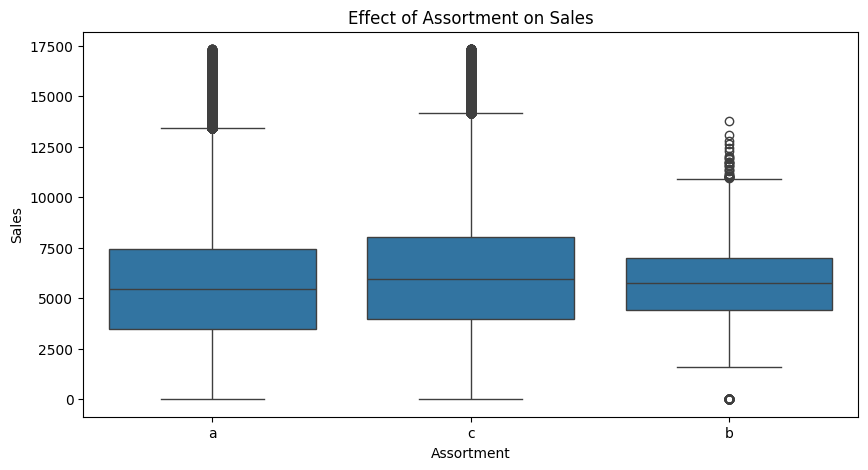

2024-09-21 22:48:18,427 - INFO - Assortment effect on sales visualized.


In [18]:
visualize_assortment_effect_on_sales(data)

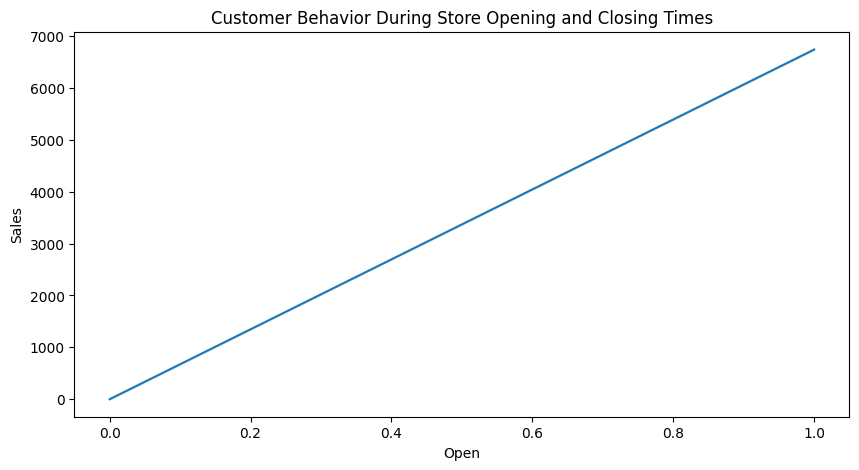

2024-09-21 22:48:48,380 - INFO - Customer behavior during store opening and closing times visualized.


In [19]:
visualize_store_opening_trends(data)

In [20]:
compare_promotion_distribution(train_df, test_df)

2024-09-21 22:48:48,396 - INFO - Training promotion mean: 0.5159092602919975, Test promotion mean: 0.5159053644947239


(0.5159092602919975, 0.5159053644947239)